# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [1]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


     |████████████████████████████████| 79 kB 3.2 MB/s 
     |████████████████████████████████| 3.5 MB 30.2 MB/s 
     |████████████████████████████████| 1.2 MB 36.2 MB/s 
     |████████████████████████████████| 67 kB 2.9 MB/s 
     |████████████████████████████████| 6.8 MB 38.1 MB/s 
     |████████████████████████████████| 895 kB 42.5 MB/s 
     |████████████████████████████████| 596 kB 50.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=274da7b00ad59a389b2b1e14524dddc904e9bced2a56297fb8e59f01c1199e34
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [4]:
# newsgroups_train

In [5]:
print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [8]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [9]:
X, y = newsgroups_train.data,newsgroups_train.target

In [10]:
X_train=[]
for each_article in X:
  X_train.append(get_review_embedding(each_article))


In [11]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [12]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)

In [13]:
X_train_pca.shape

(11314, 2)

In [14]:
type(X_train_pca)

numpy.ndarray

# K_Means Algorithm


In [15]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=4).fit(X_train_pca)
kmeans.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

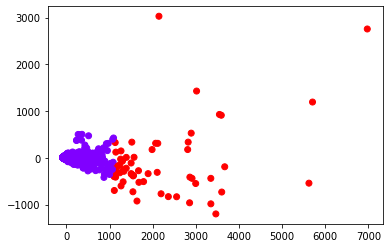

In [16]:
#code for visualisation of clusters
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=kmeans.labels_,cmap="rainbow")
plt.show()

# Elbow method

* Try to understand how elbow method works

Elbow Method is used to determine the optimal value of k in K Means Clustering. Clustering is minimising the distance between points in cluster and maximising the distance between clusters.The academic term for distance between points in a clusters is WCSS(within cluster sum of squares). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. The WCSS value will be largest when k=1 and 0 when k=no of data points. The optimal value of k is the value after which the drop in the value of WCSS is minimum.

*   Use elbow method to find the optimal number of clusters.

In [17]:
def elbow_method():
  dist=[]
  for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X_train)
    dist.append(kmeans.inertia_)
  return dist

Plot the graph between average distance and the number of clusters.

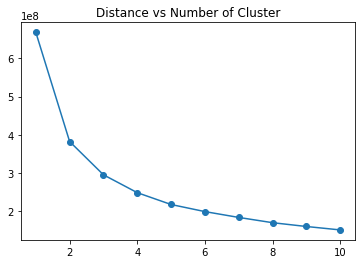

In [18]:
plt.plot([x for x in range(1, 11)],elbow_method(),marker='o')
plt.title("Distance vs Number of Cluster")
plt.show()

# Silhouette Method
*   Find the optimal number of clusters using silhouette method
*   Compute silhouette score varying the K number of clusters.









In [19]:
def silhouette_score_func():
  slh_score=[]
  for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(X_train)
    slh_score.append(silhouette_score(X_train,kmeans.labels_))
  # print(slh_score)
  return slh_score

*   Plot the graph between silhoutte score and number of clusters.

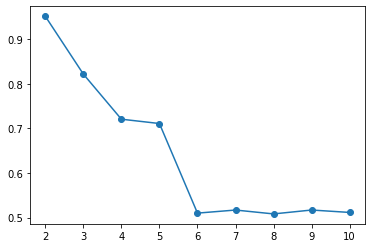

In [21]:
plt.plot([x for x in range(2, 11)],silhouette_score_func(),marker='o')
plt.title("")
plt.show()

> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)

The Optimal number of clusters using Elbow Method can be (3,4 or 5 ) as after these points the drop in WCSS score is very low.<br> 
The Optimal number of clusters using Silhouette Method can be (2,3,4 ) as the silhouette score is maximum on these points.<br>
We can take intersection of both elbow method and silhouette,so the optimal value of k can be 3 and 4.

# Agglomerative clustering

In [22]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def Agglomerative_Clustering_func():
  clustering = AgglomerativeClustering(n_clusters=3).fit(X_train)
  return clustering.labels_


In [28]:
agglo_model=AgglomerativeClustering(distance_threshold=0,n_clusters=None)
agglo_model=agglo_model.fit(X_train)

In [33]:
#code for visualisation of clusters

# plt.scatter(np.array(X_train)[:,0],np.array(X_train)[:,1],c=Agglomerative_Clustering_func(),cmap="rainbow")
# plt.show()


# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering

In [24]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [27]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

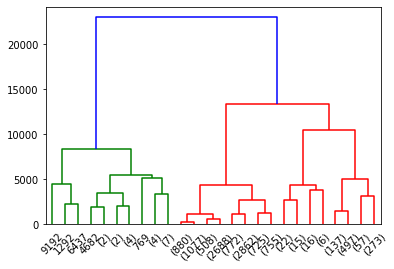

In [32]:
plot_dendrogram(agglo_model,truncate_mode='level',p=4)

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


